In [209]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

df=pd.read_csv("levels_fyi_salary_data.csv")
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,9/9/2018 11:52:32,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [211]:
df["timestamp"]=pd.to_datetime(df["timestamp"])
df["basesalary"]=df["basesalary"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                62642 non-null  datetime64[ns]
 1   company                  62637 non-null  object        
 2   level                    62523 non-null  object        
 3   title                    62642 non-null  object        
 4   totalyearlycompensation  62642 non-null  int64         
 5   location                 62642 non-null  object        
 6   yearsofexperience        62642 non-null  float64       
 7   yearsatcompany           62642 non-null  float64       
 8   tag                      61788 non-null  object        
 9   basesalary               62642 non-null  int64         
 10  stockgrantvalue          62642 non-null  float64       
 11  bonus                    62642 non-null  float64       
 12  gender                   43102 n

In [212]:
df=df.drop(["rowNumber","dmaid","cityid","stockgrantvalue","timestamp"],axis=1)


In [213]:
df

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,bonus,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,10000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,35000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000,22000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900,16000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000,20000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688,29000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [214]:
df["is_faang"]=df["company"].apply(lambda x: 1 if x in ["Facebook","Amazon","Apple","Netflix","Google"] else 0)


In [215]:
df.replace("",np.nan,inplace=True)

In [216]:
df.isna().sum()

company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
bonus                          0
gender                     19540
otherdetails               22505
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
is_faang                       0
dtype: int64

<AxesSubplot:>

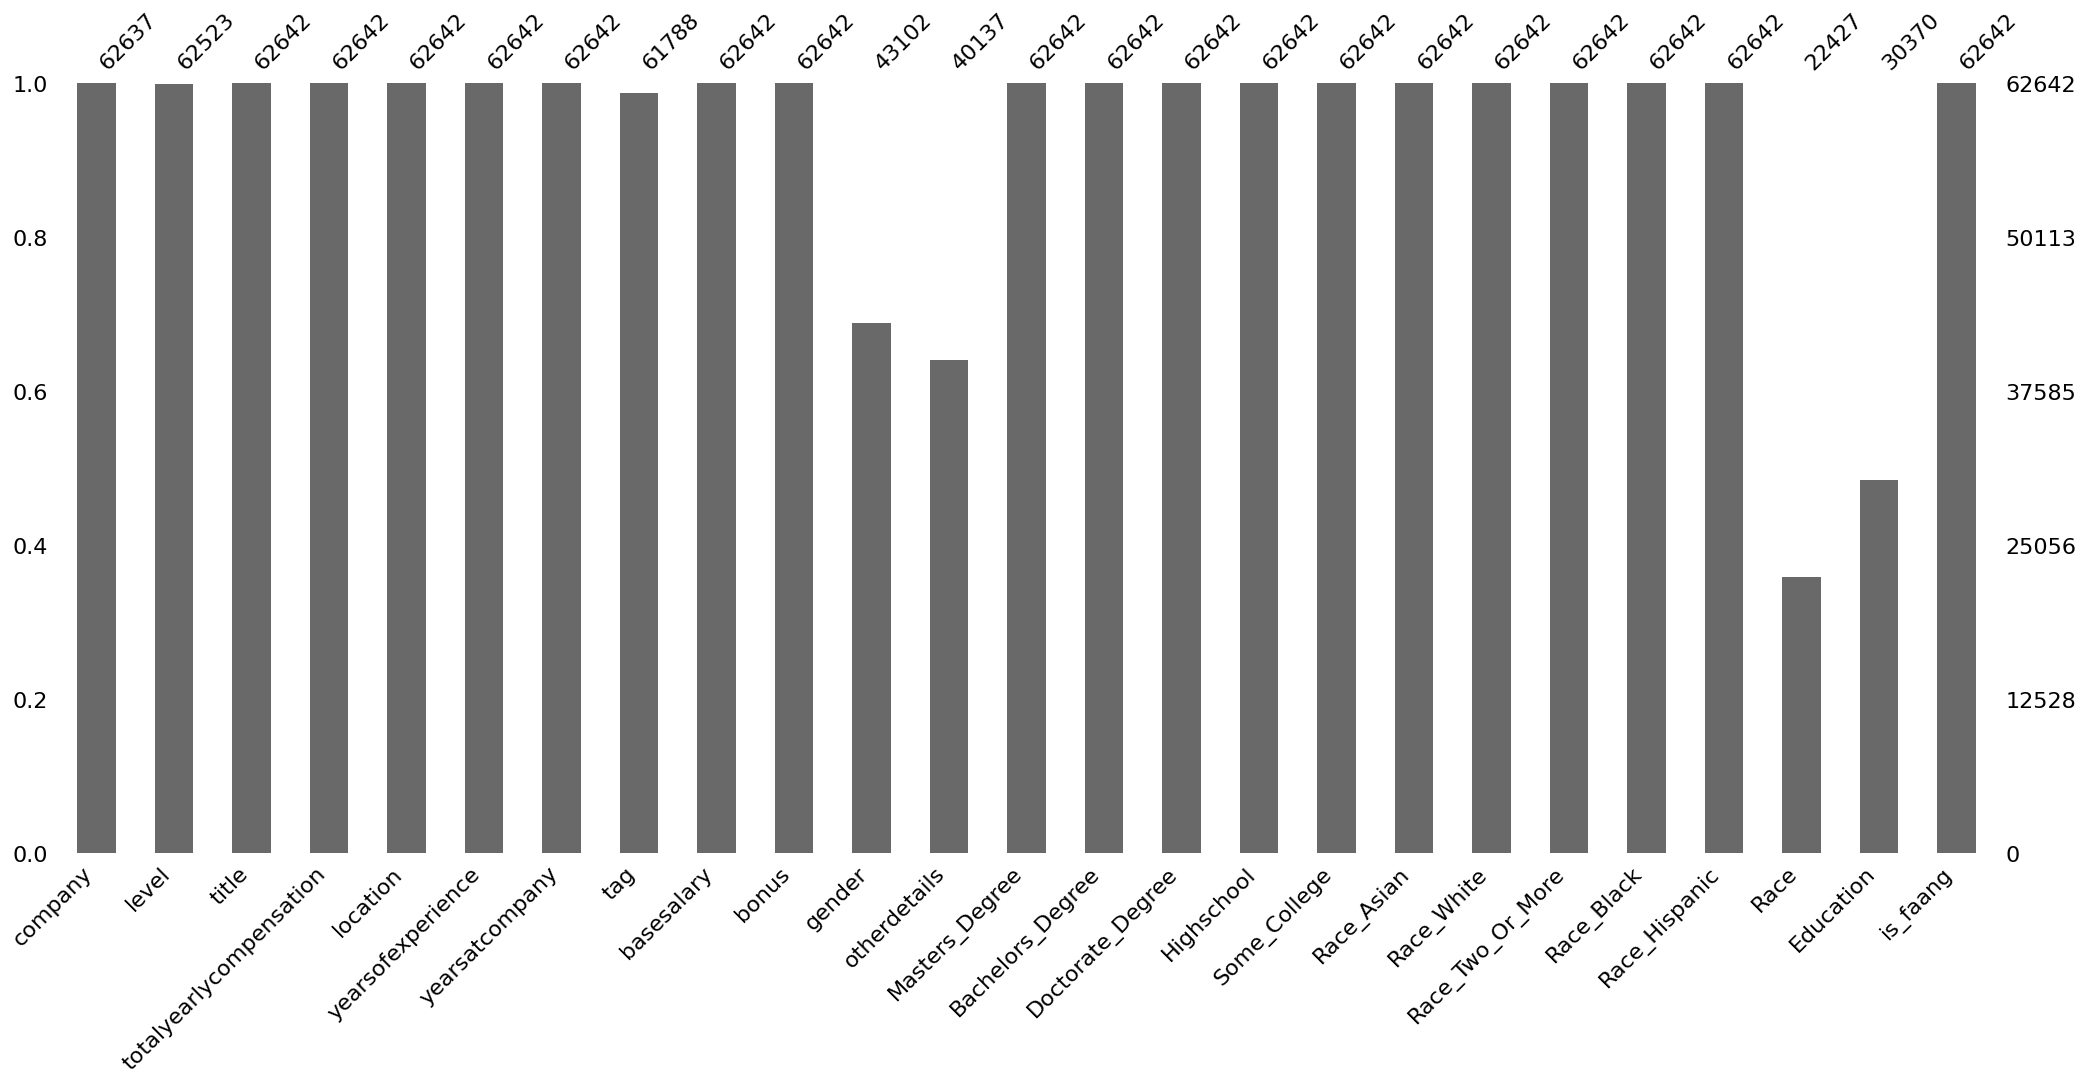

In [217]:
missingno.bar(df=df)

In [218]:
datos_numericos=df.select_dtypes(["float64","int64"])
datos_categoricos=df.select_dtypes(["object"])

In [219]:
for col in datos_categoricos:
    df[col].fillna(df[col].mode().values[0],inplace=True)


In [220]:
for col in datos_numericos:
    df[col].fillna(df[col].mean(),inplace=True)



In [221]:
df.isna().sum()

company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
bonus                      0
gender                     0
otherdetails               0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Race                       0
Education                  0
is_faang                   0
dtype: int64

In [222]:
df.duplicated().sum()

302

In [223]:
df=df.drop_duplicates()

<AxesSubplot:xlabel='basesalary'>

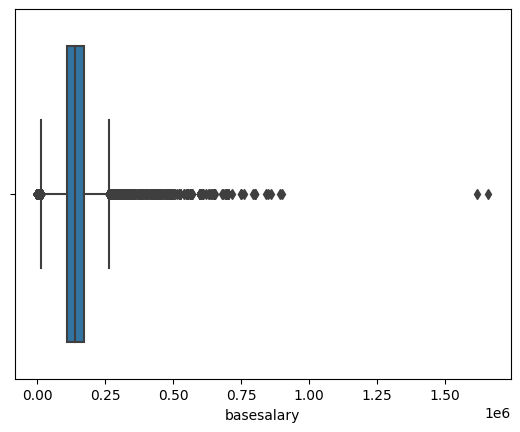

In [224]:
sns.boxplot(x=df.basesalary)


In [225]:
from scipy.stats.mstats import winsorize
lim_superiorr=0.02
lim_inferior=0.02


In [226]:
col_to_winsorize =["basesalary","yearsatcompany","yearsofexperience"]

for col in col_to_winsorize:
    df[col]=winsorize(df[col],limits=[lim_inferior,lim_superiorr])

/tmp/ipykernel_4399/442969763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=winsorize(df[col],limits=[lim_inferior,lim_superiorr])


In [227]:
df.describe()

/home/sergio/anaconda3/envs/datasc/lib/python3.9/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/sergio/anaconda3/envs/datasc/lib/python3.9/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/sergio/anaconda3/envs/datasc/lib/python3.9/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/sergio/anaconda3/envs/datasc/lib/python3.9/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/sergio/anaconda3/envs/datasc/lib/python3.9/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/sergio/anaconda3/envs/datasc/lib/python3.9/s

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,is_faang
count,6.234000e+04,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000
mean,2.163281e+05,7.136051,2.630751,135159.180382,19338.694189,0.246182,0.201861,0.028858,0.005133,0.005695,0.188450,0.128649,0.012865,0.011020,0.018094,0.282820
std,1.381433e+05,5.593899,2.927262,54702.034952,26800.859652,0.430789,0.401392,0.167408,0.071462,0.075248,0.391075,0.334814,0.112693,0.104398,0.133294,0.450373
min,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,108000.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,140000.000000,14000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,170000.000000,26000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.980000e+06,22.000000,13.000000,250000.000000,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [228]:
df=df[df["is_faang"]==1]

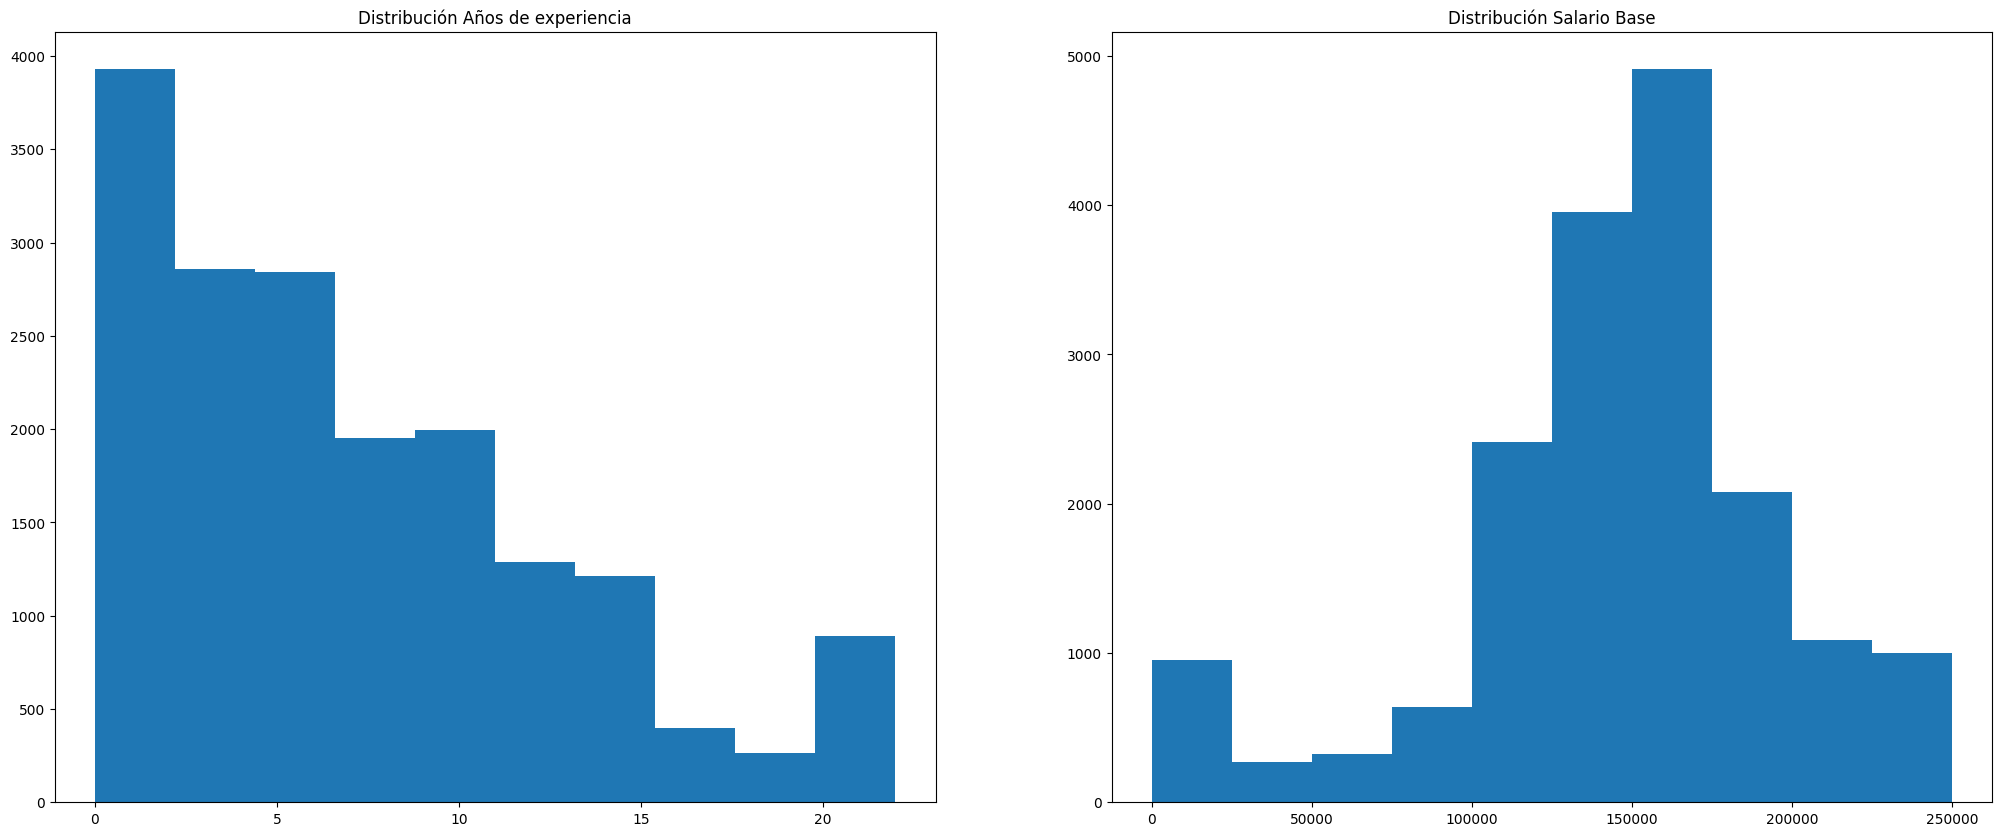

In [229]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.hist(x=df.yearsofexperience)
plt.title("Distribución Años de experiencia")

plt.subplot(1,2,2)
plt.hist(x=df.basesalary)
plt.title("Distribución Salario Base")

plt.show()

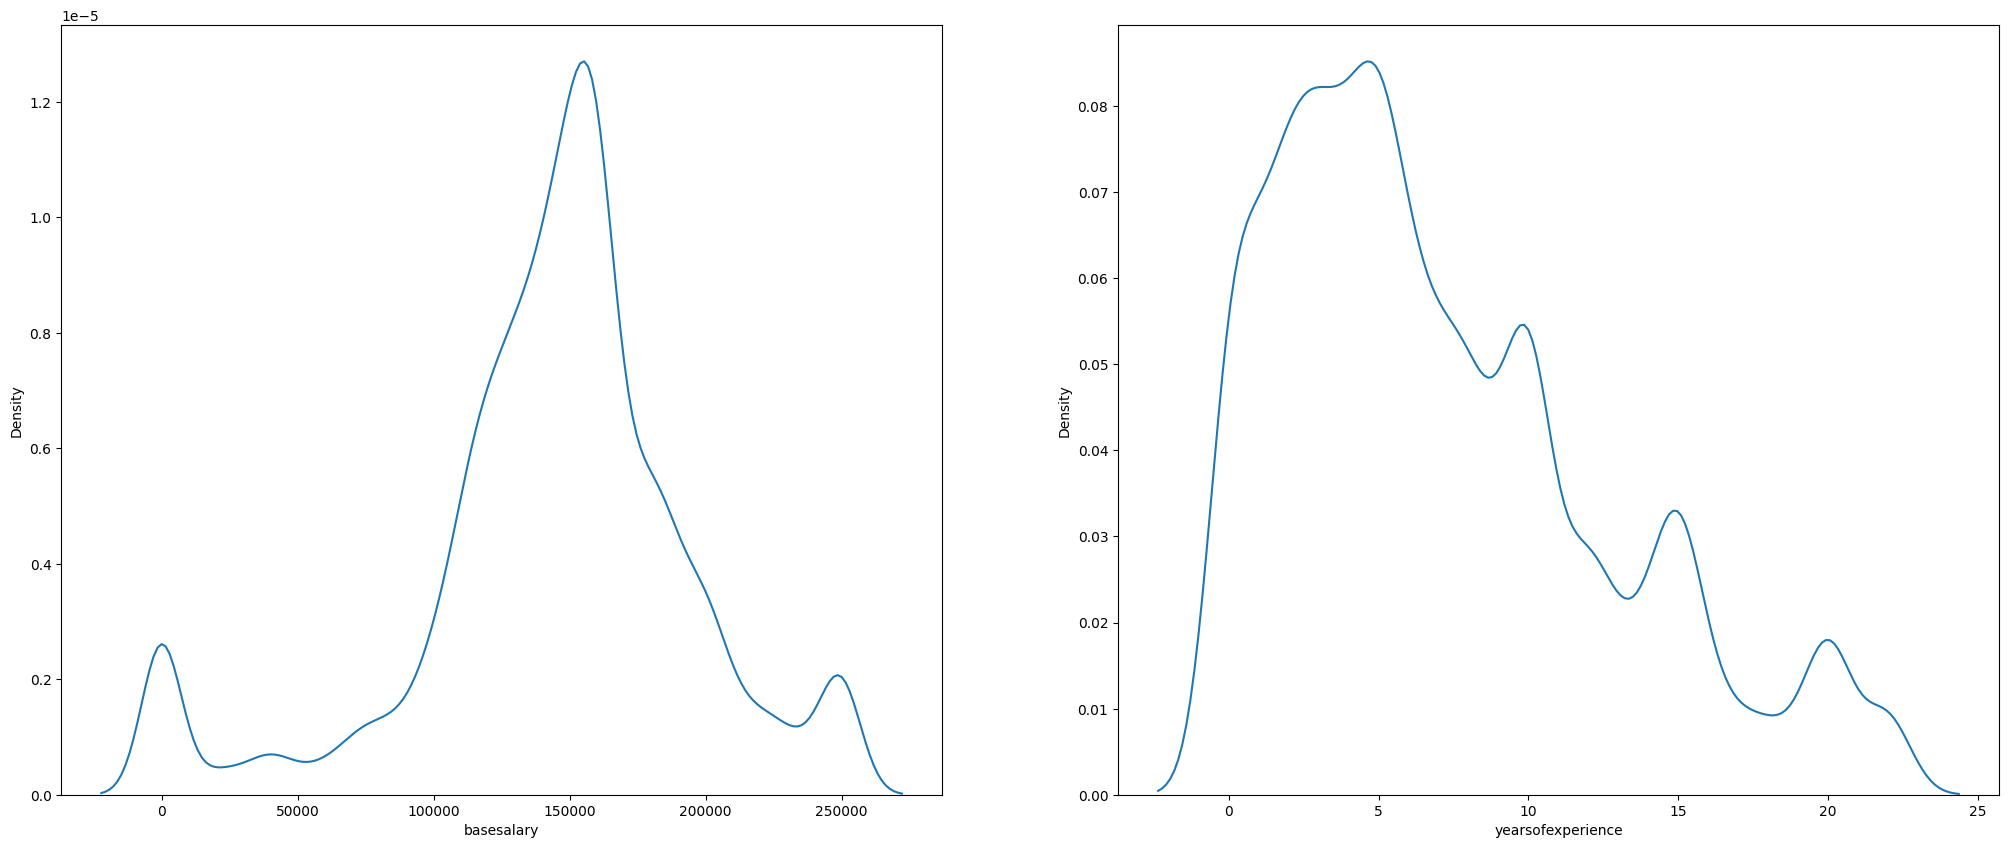

In [230]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
sns.kdeplot(data=df,x="basesalary")



plt.subplot(1,2,2)
sns.kdeplot(data=df,x="yearsofexperience")

plt.show()

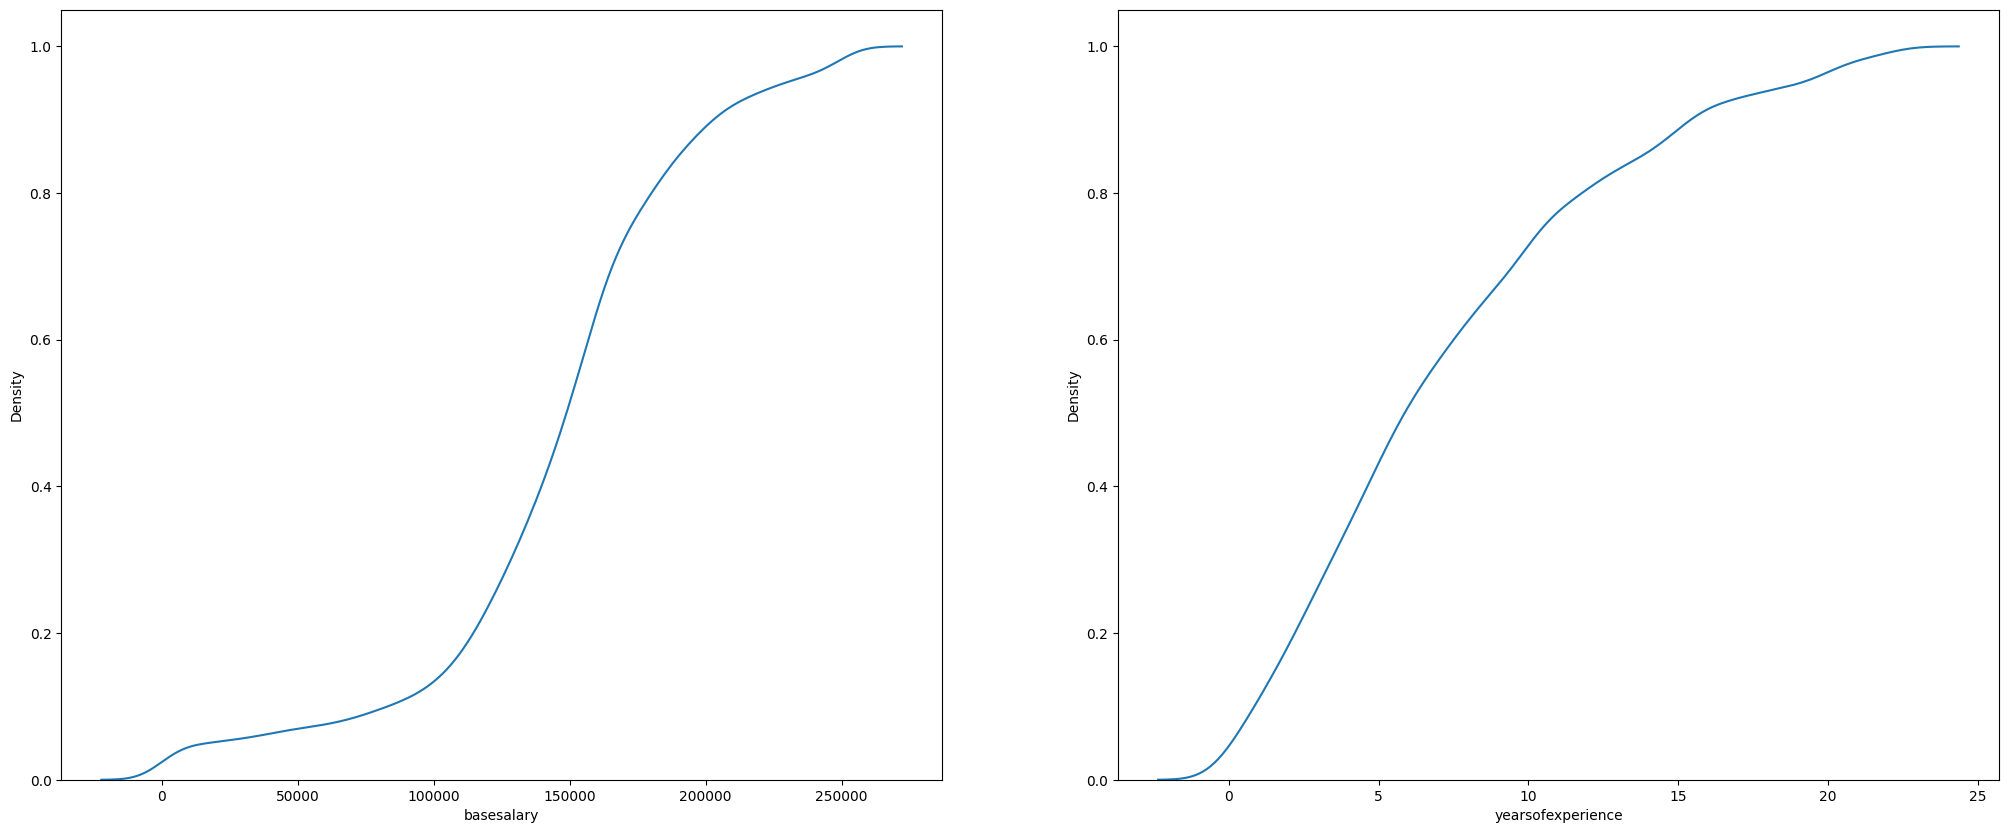

In [231]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
sns.kdeplot(data=df,x="basesalary",cumulative=True)



plt.subplot(1,2,2)
sns.kdeplot(data=df,x="yearsofexperience",cumulative=True)

plt.show()

In [232]:
cols_skew_curt = ["basesalary","yearsofexperience"]

for i in cols_skew_curt:
    print(i,":")
    print("Esta distribución tiene una asimetría de: ",df[i].skew())
    print("Esta distribución tiene una curtosis de: ",df[i].kurt())
    print("----------------------------------------------------")


basesalary :
Esta distribución tiene una asimetría de:  -0.7722729165891571
Esta distribución tiene una curtosis de:  1.3460661286879585
----------------------------------------------------
yearsofexperience :
Esta distribución tiene una asimetría de:  0.8244464957066859
Esta distribución tiene una curtosis de:  -0.058572296500536414
----------------------------------------------------


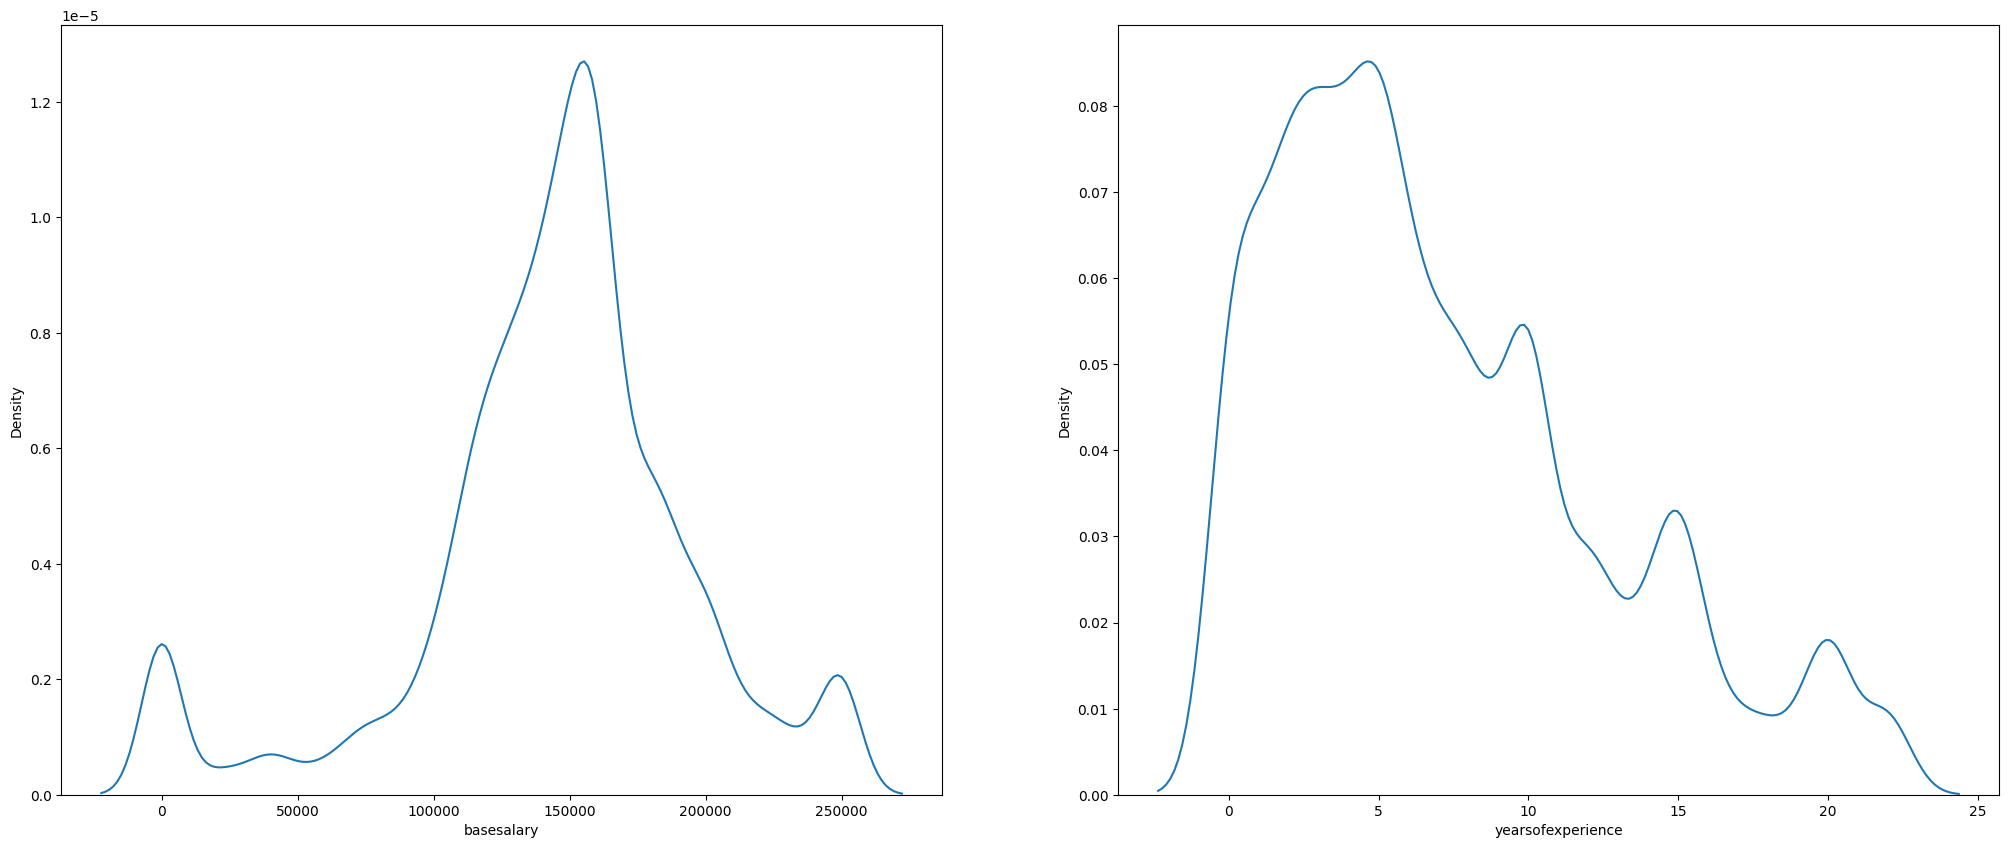

In [233]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
sns.kdeplot(data=df,x="basesalary")



plt.subplot(1,2,2)
sns.kdeplot(data=df,x="yearsofexperience")

plt.show()

<AxesSubplot:xlabel='company', ylabel='count'>

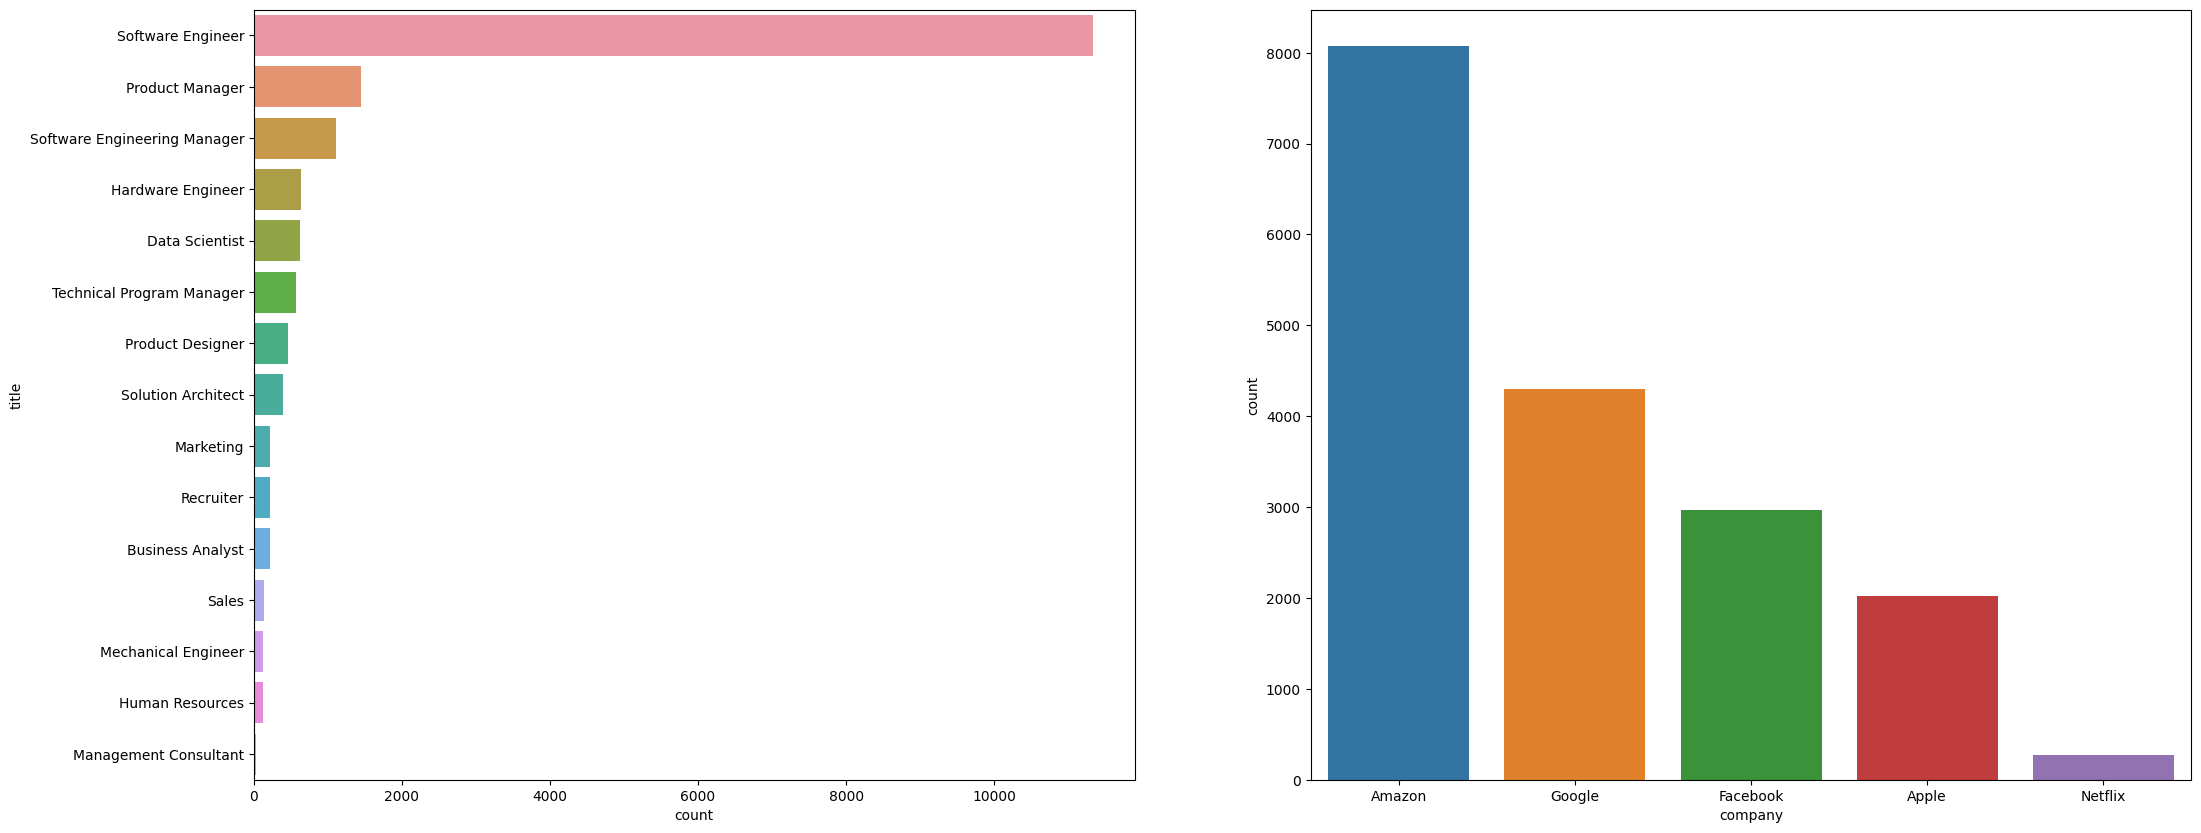

In [242]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)

sns.countplot(data=df,y="title",order= df["title"].value_counts().index)
plt.subplot(1,2,2)

sns.countplot(data=df,x="company",order= df["company"].value_counts().index)

/tmp/ipykernel_4399/3727996987.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot:>

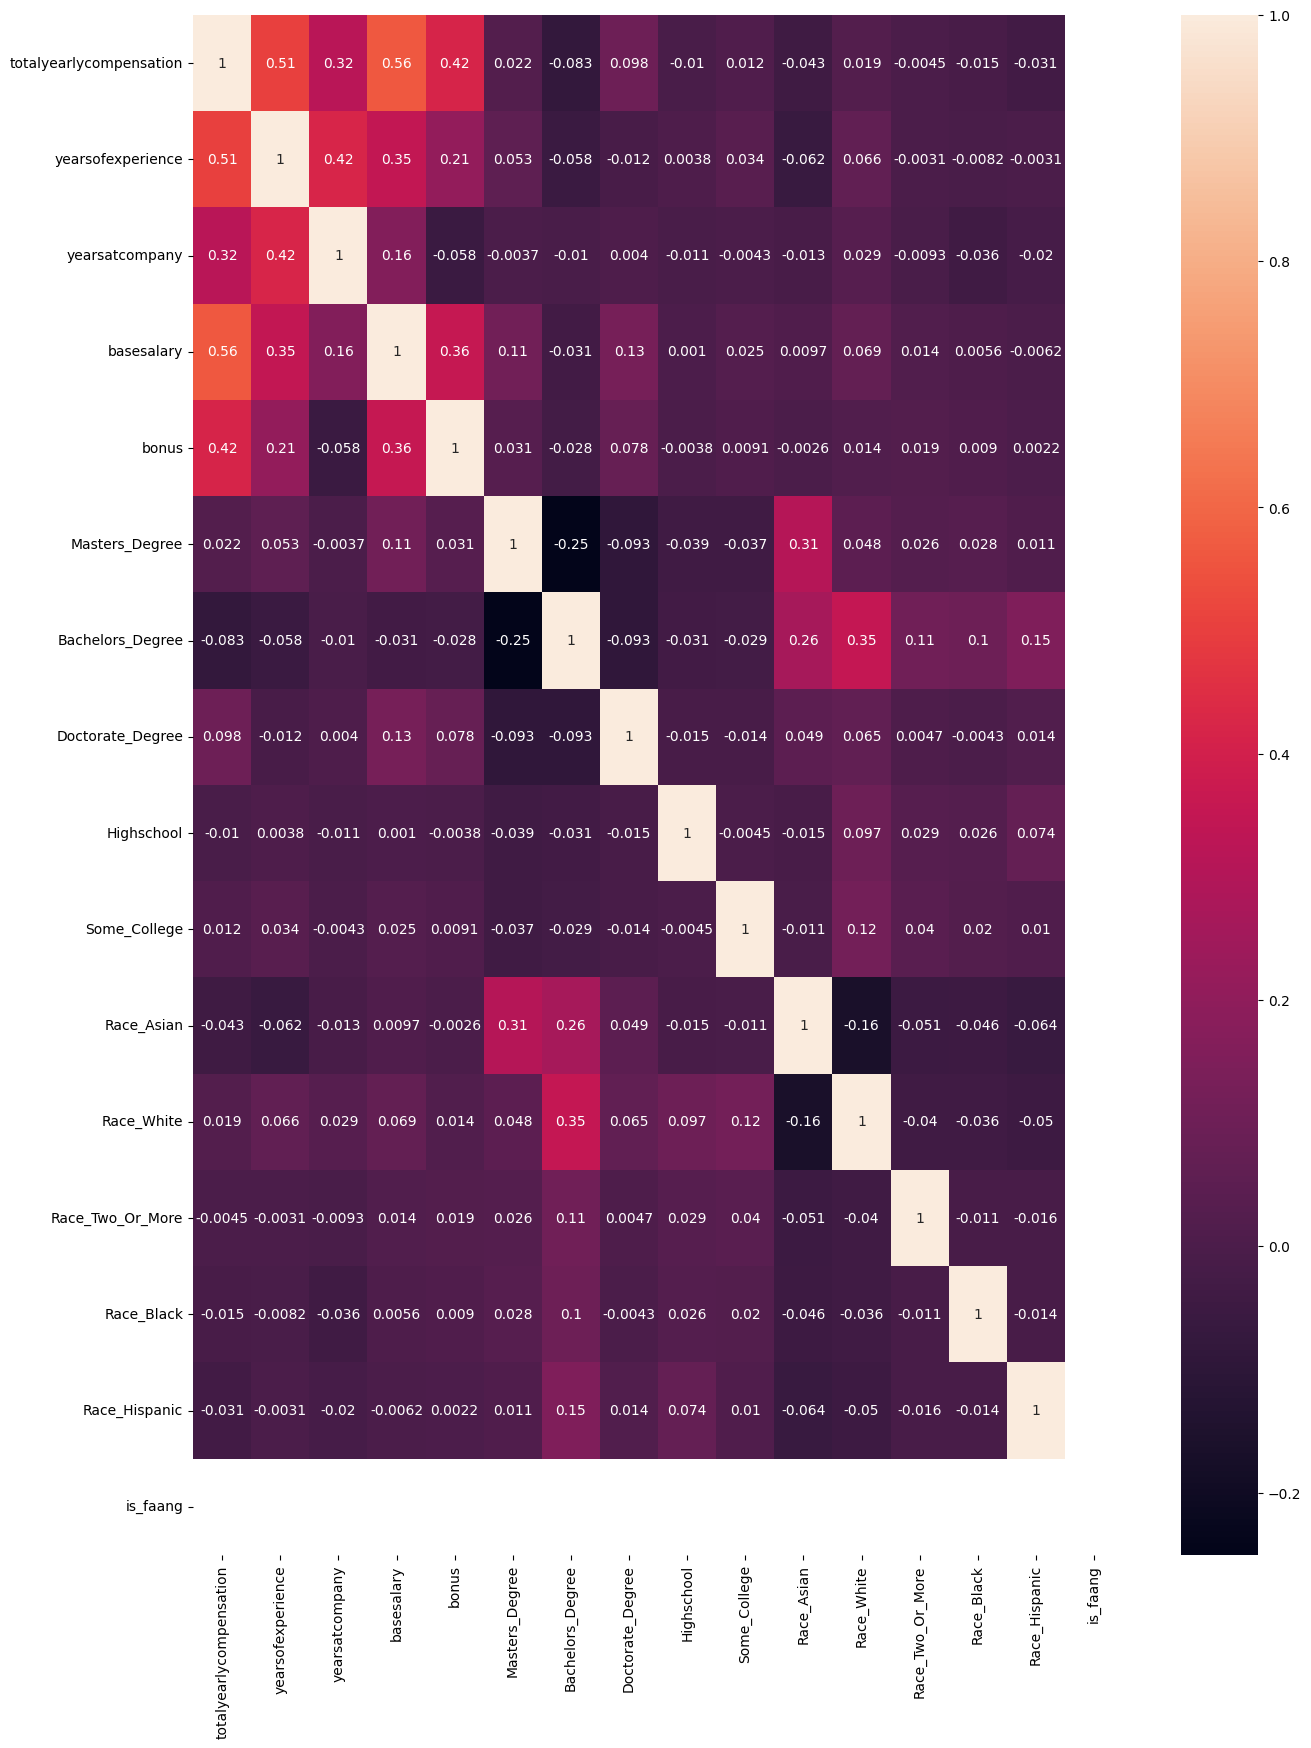

In [249]:
    plt.figure(figsize=(15,20))
    sns.heatmap(df.corr(),annot=True)

/tmp/ipykernel_4399/2324657299.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()**2,annot=True)


<AxesSubplot:>

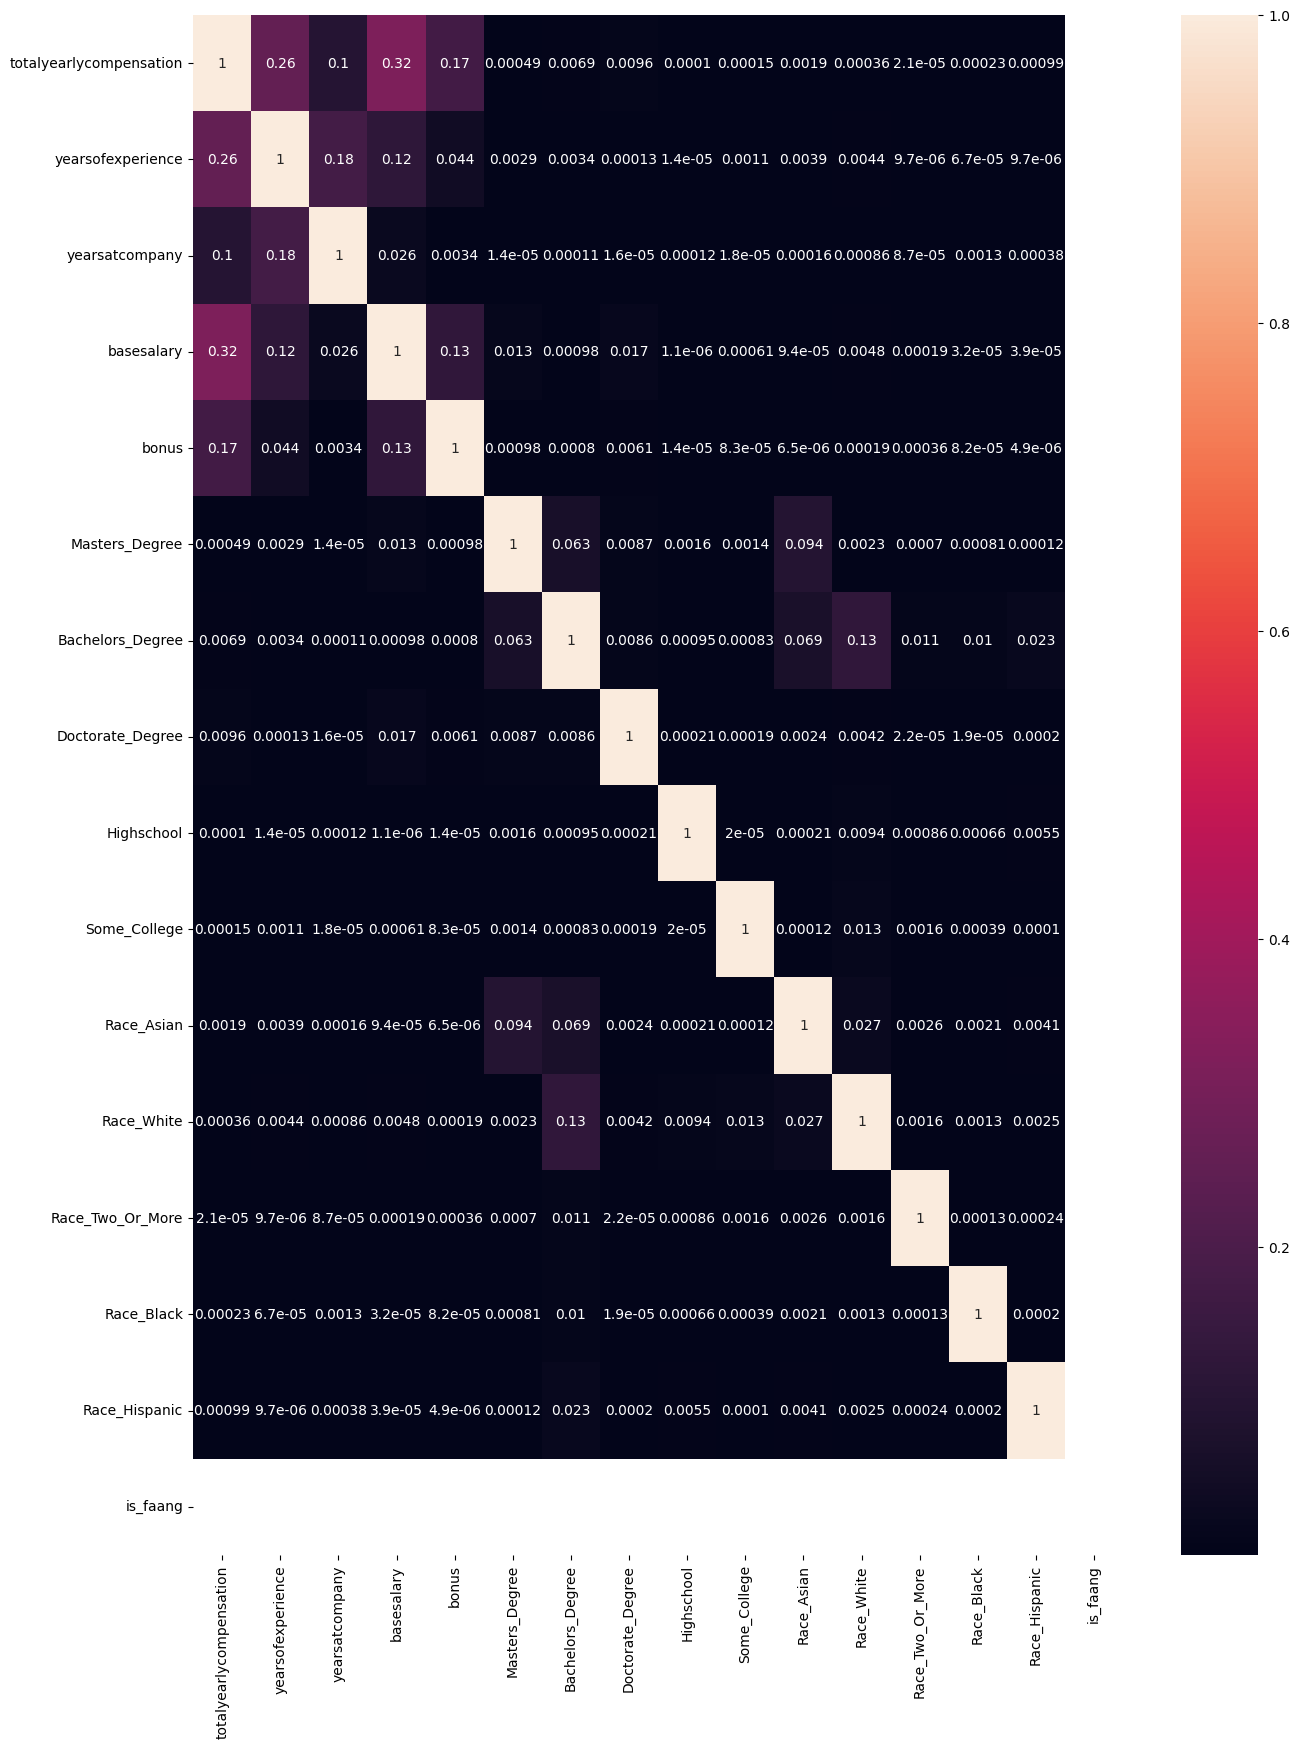

In [250]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr()**2,annot=True)

<Figure size 2000x1500 with 0 Axes>

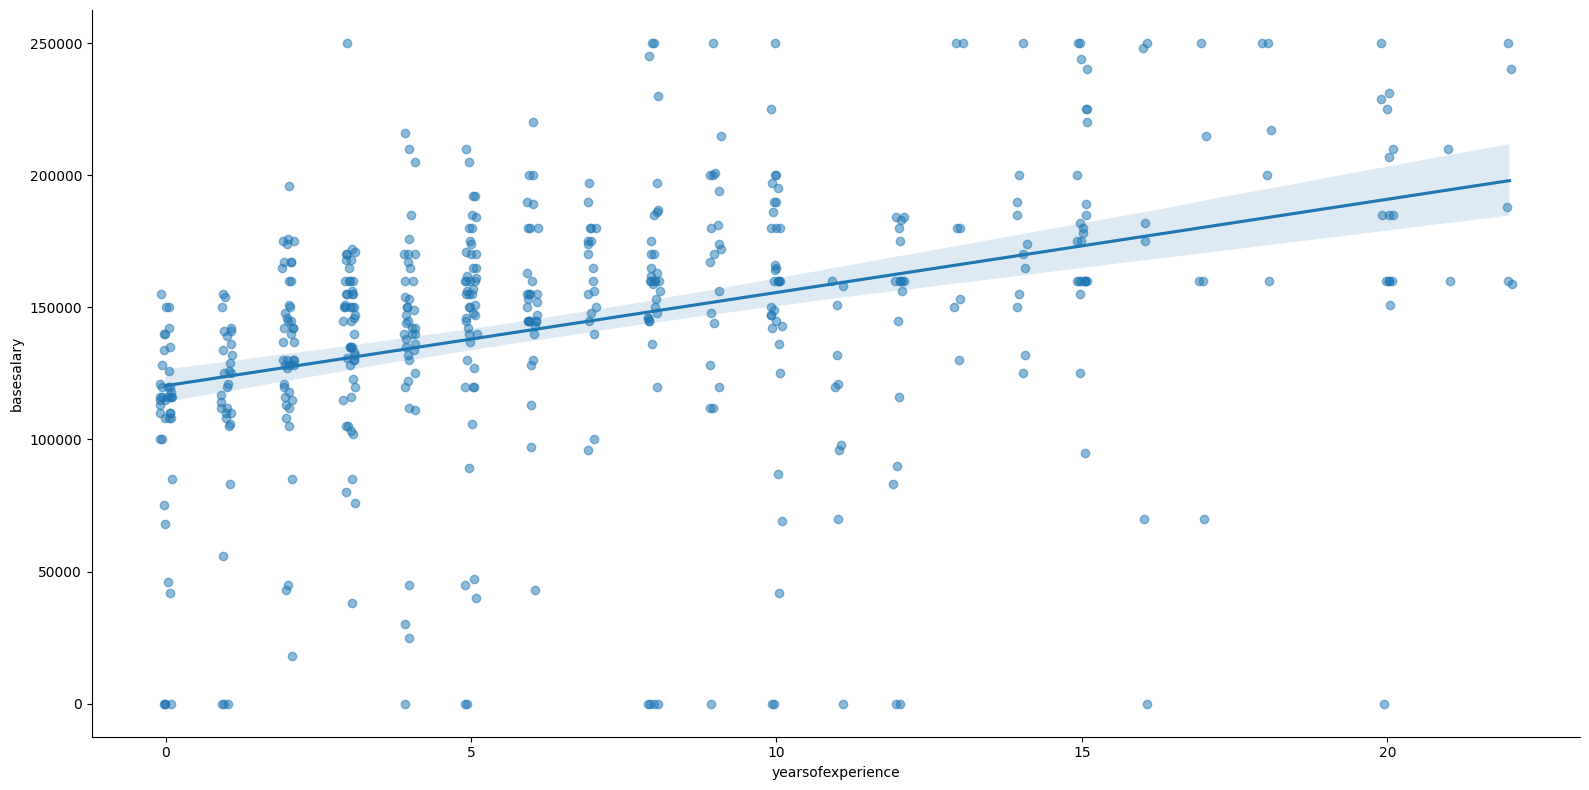

In [256]:
plt.figure(figsize=(20,15))

sns.lmplot(data=df.sample(500),x="yearsofexperience", y="basesalary",height=8,aspect=2,scatter_kws={"alpha":0.5},x_jitter=0.1)

<AxesSubplot:xlabel='yearsofexperience', ylabel='basesalary'>

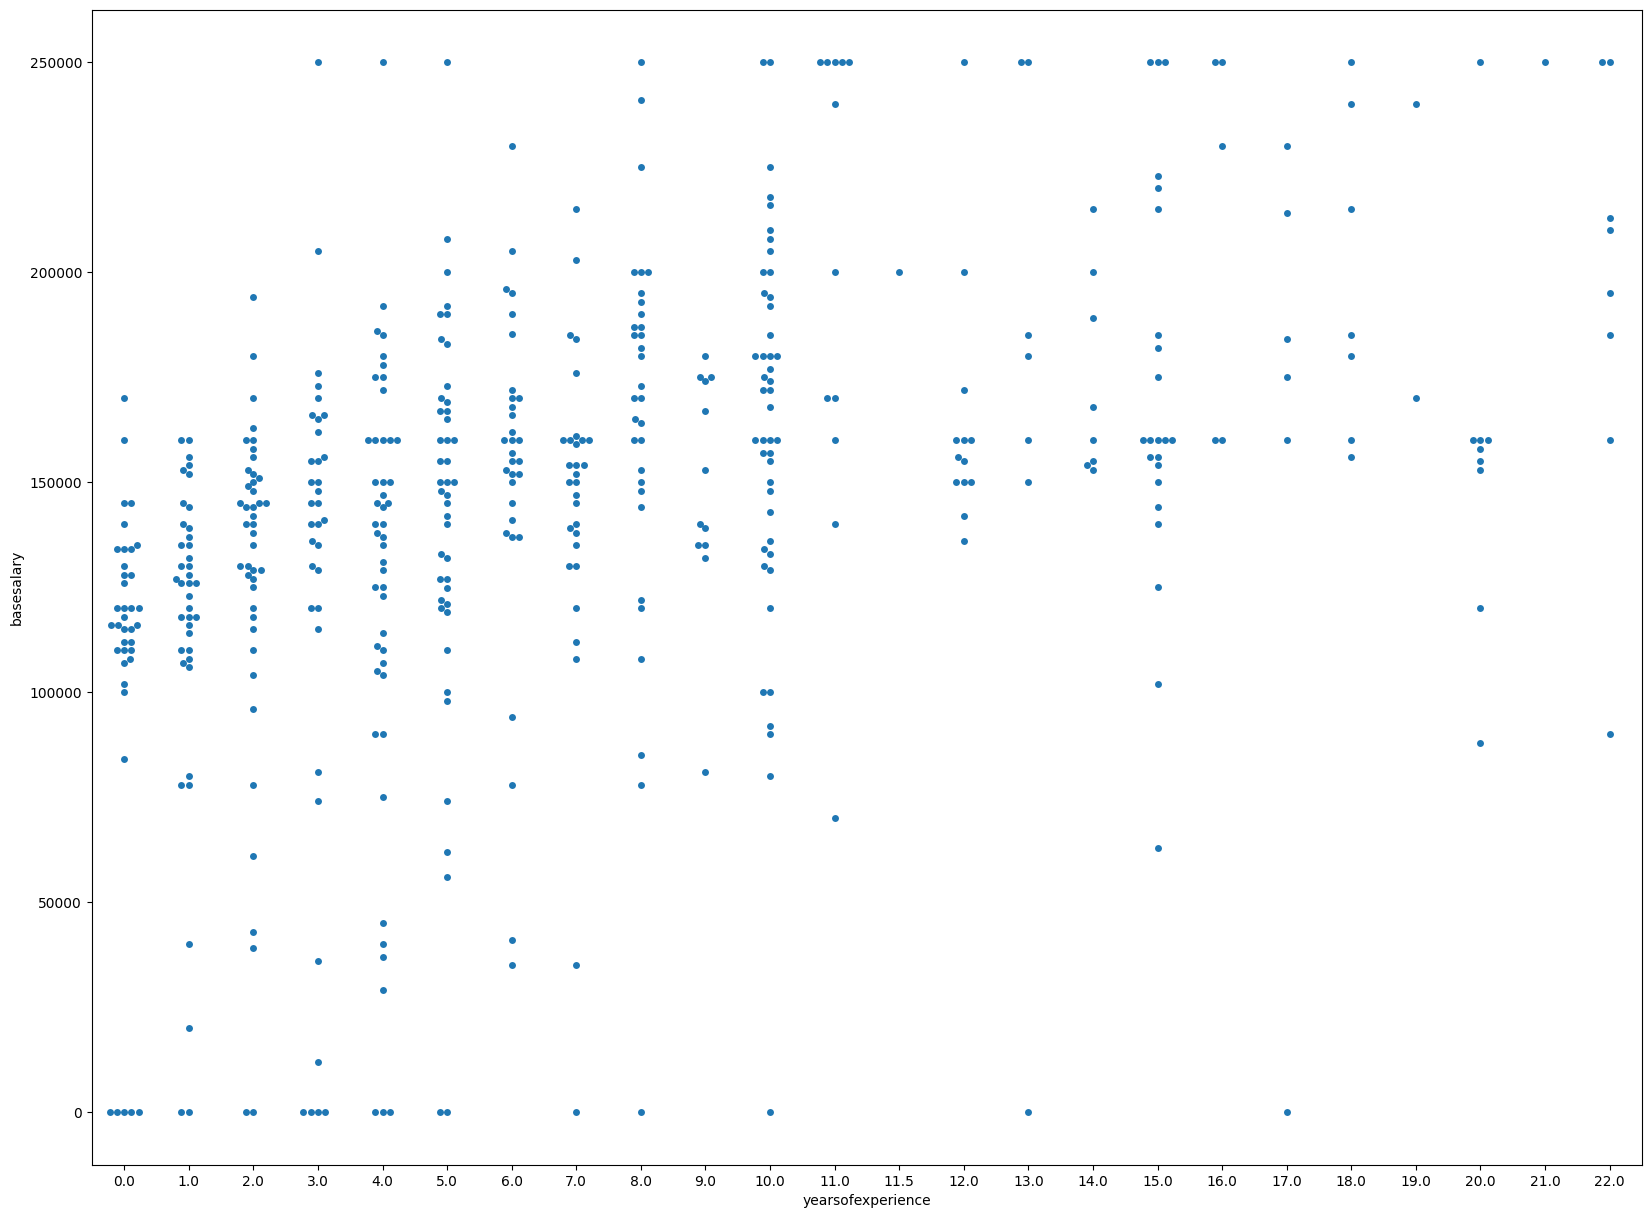

In [257]:
plt.figure(figsize=(20,15))

sns.swarmplot(data=df.sample(500),x="yearsofexperience", y="basesalary")

<AxesSubplot:xlabel='company', ylabel='basesalary'>

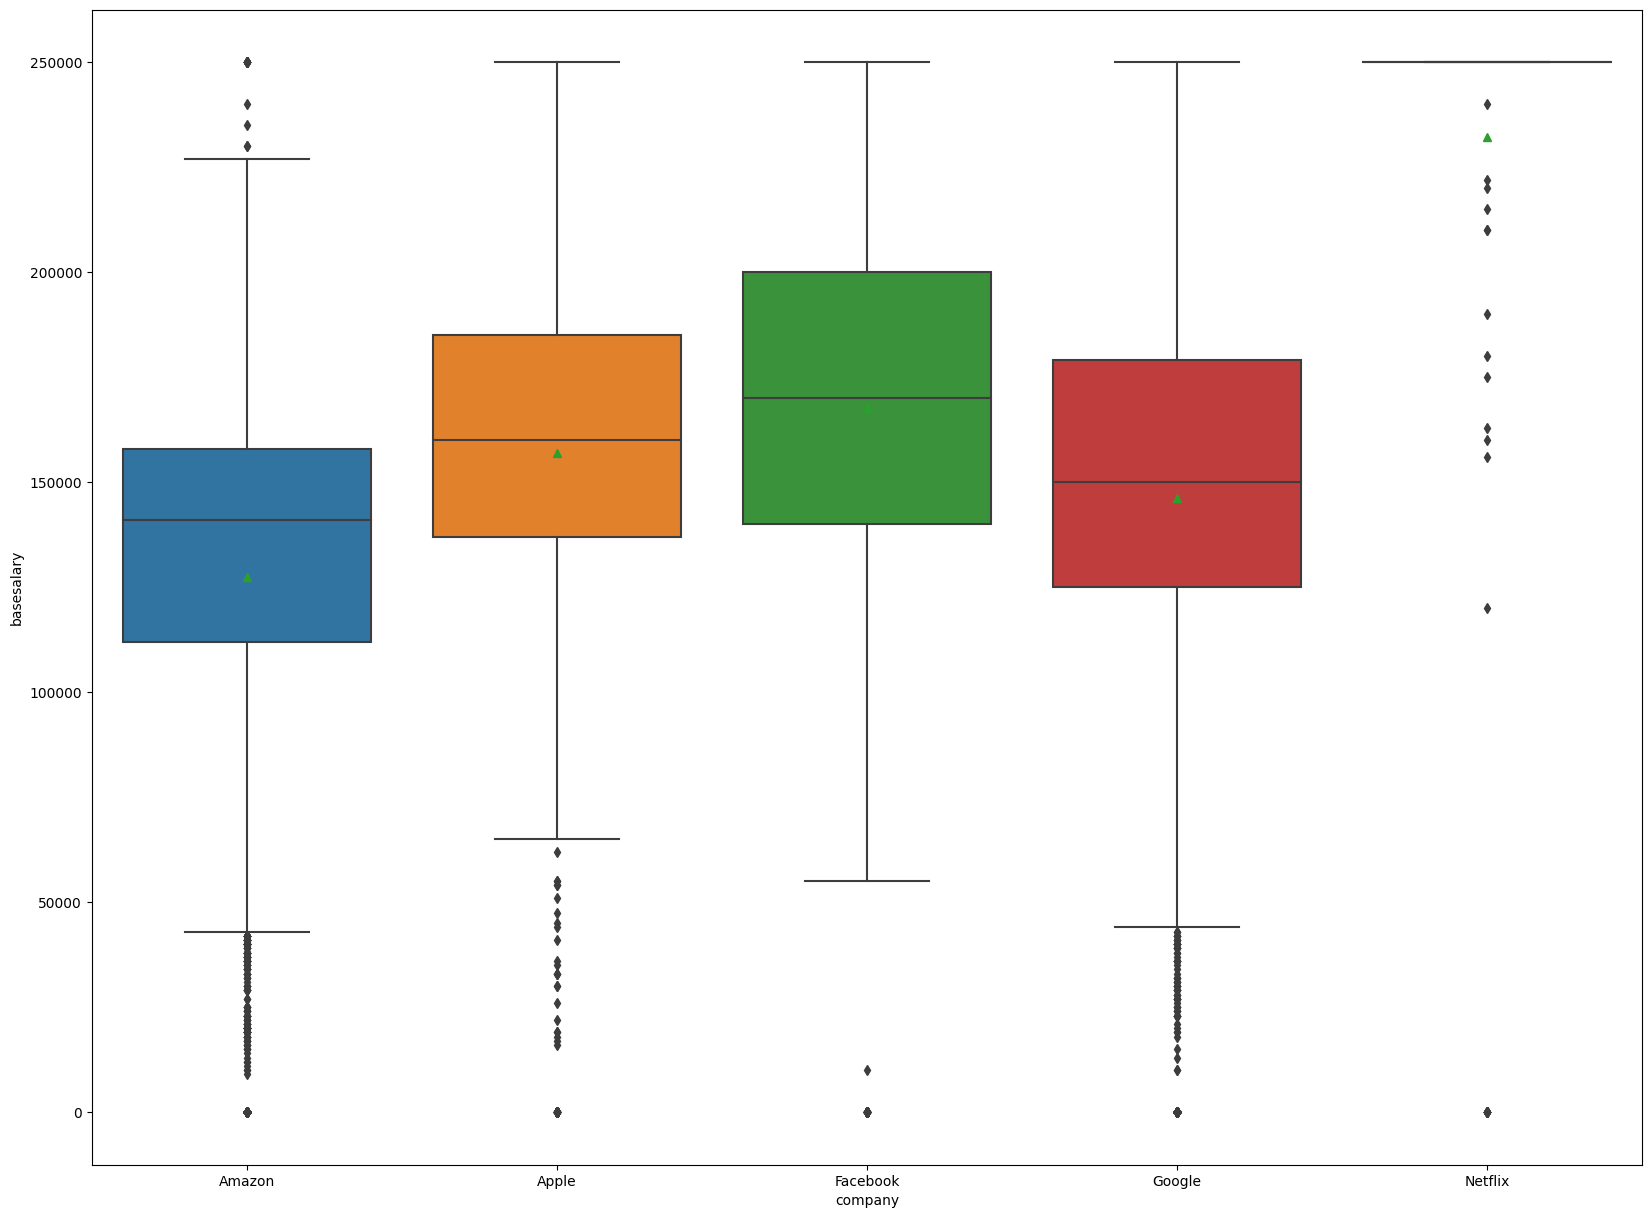

In [260]:
plt.figure(figsize=(20,15))

sns.boxplot(data=df,x="company", y="basesalary", showmeans=True)

In [263]:
from wordcloud import WordCloud

In [265]:
tag_words= ""
stop_words ={"nan","title"}

for i in df.tag:
    i=str(i)
    separate= i.split()
    for j in range(len(separate)):
        separate[j]=separate[j].lower()

    tag_words += " ".join(separate)+" "


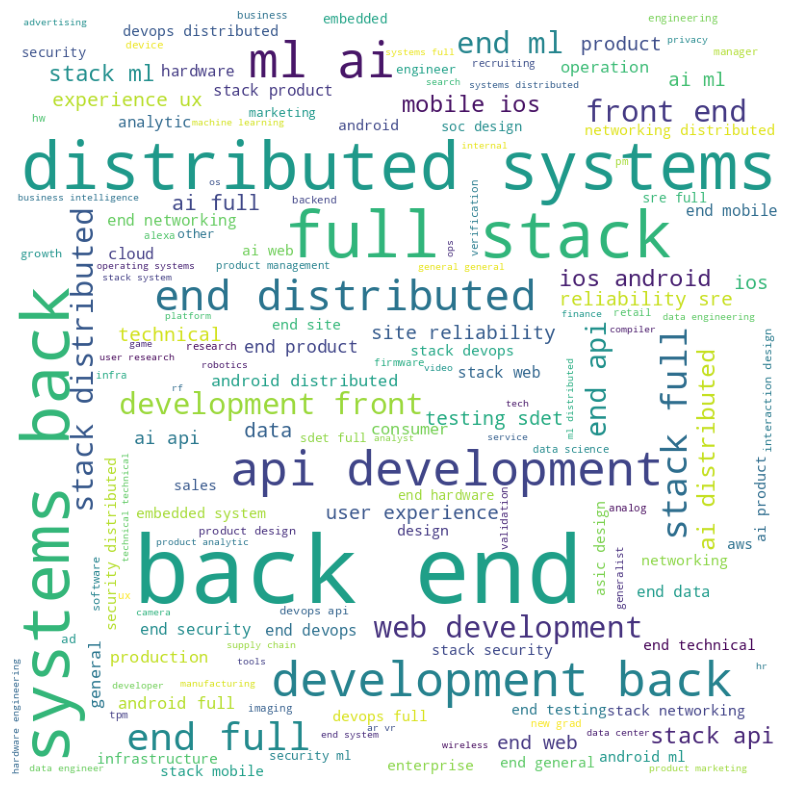

In [270]:
word_cloud=WordCloud(width=800, height=800,
                    background_color="white",
                    stopwords=stop_words,
                    min_font_size=10).generate(tag_words)

plt.figure(figsize=(10,10))
plt.imshow(word_cloud)
plt.axis("off")

plt.show()